<a href="https://colab.research.google.com/github/AnastasiaKazanas/ANN-Final-Project/blob/main/BOW_LR/FakeNewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import torch
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import kagglehub

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

# Load the dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/saurabhshahane/fake-news-classification/versions/77/WELFake_Dataset.csv")

print("Dataset preview:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())

# missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)
df.dropna(subset=['text', 'label'], inplace=True)

# Filter the data
filtered_texts = []
filtered_labels = []
for text, label in zip(df['text'], df['label']):
    if len(text) > 50 and text not in filtered_texts:
        filtered_texts.append(text)
        filtered_labels.append(label)

# Create a new filtered DataFrame
filtered_df = pd.DataFrame({'text': filtered_texts, 'label': filtered_labels})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


100%|██████████| 92.1M/92.1M [00:01<00:00, 90.5MB/s]

Extracting files...


Dataset preview:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Dataset statistics:
         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    1803

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

# Apply text preprocessing
filtered_df['processed_text'] = filtered_df['text'].apply(preprocess_text)

# Split the dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(
    filtered_df['processed_text'], filtered_df['label'], test_size=0.2, random_state=42
)


Model Accuracy: 0.96
Unique classes in test labels: [0, 1]

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      6968
        True       0.95      0.95      0.95      5521

    accuracy                           0.96     12489
   macro avg       0.96      0.96      0.96     12489
weighted avg       0.96      0.96      0.96     12489



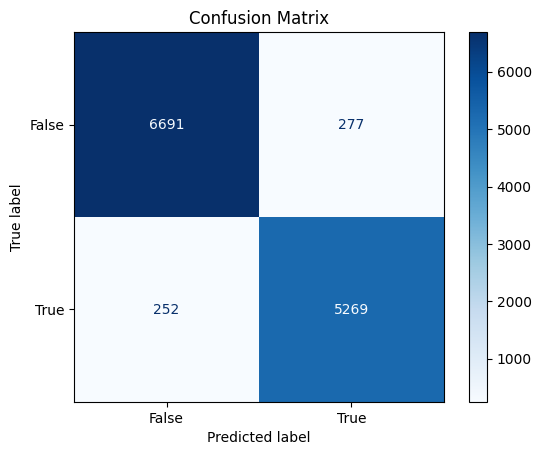


Sample Predictions:

Sample 1
Text: berlin reuters  the united states informed germany shortly before it launched missile strikes on a syrian airbase from which washington said a deadly chemical weapons attack had been launched this week a german government spokesman said on friday the us government informed the chancellery and defense minister during the night german government spokesman steffen seibert told a regular news conference a spokesman for the defense ministry added the defense minister was informed about the strikes by her american colleague james mattis shortly beforehand a spokesman for germanys foreign ministry said the united states had given berlin the impression during the contact overnight that this was a targeted and limited attack  
Predicted: False, Actual: False

Sample 2
Text: budapest reuters  hungary will not change its antiimmigration stance after the european union s top court dismissed a challenge against migrant quotas prime minister viktor orban said on 

In [ ]:
# Tfidf
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Model Training with Logistic Regression
model = LogisticRegression(max_iter=200, solver='saga', penalty='l2', C=1.0)
model.fit(X_train, train_labels)

# Predict on the test set
predictions = model.predict(X_test)

accuracy = accuracy_score(test_labels, predictions)
print(f"\nModel Accuracy: {accuracy:.2f}")

# single-class case
unique_classes = sorted(test_labels.unique())
print("Unique classes in test labels:", unique_classes)

target_names = ['False', 'True'][:len(unique_classes)]

# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, predictions, labels=unique_classes, target_names=target_names))

# Confusion Matrix
if len(unique_classes) > 1:  # Plot confusion matrix only if there are at least two classes
    conf_matrix = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=target_names)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("\nConfusion Matrix not displayed due to single class in the test set.")

# Display a few predictions
print("\nSample Predictions:")
for i, (text, pred, true_label) in enumerate(zip(test_texts[:5], predictions[:5], test_labels[:5])):
    print(f"\nSample {i+1}")
    print(f"Text: {text}")
    print(f"Predicted: {'True' if pred else 'False'}, Actual: {'True' if true_label else 'False'}")